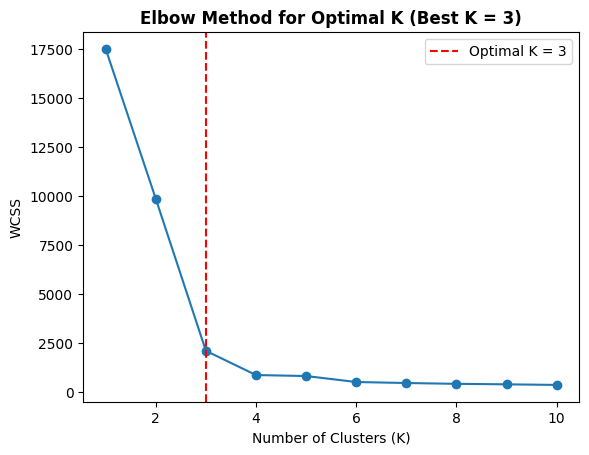

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator  # <--- Add this line

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=5, random_state=42)

# Compute WCSS for different K
wcss = []
K_values = range(1, 11)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Detect the elbow (optimal K)
knee = KneeLocator(K_values, wcss, curve='convex', direction='decreasing')
optimal_k = knee.elbow

# Plot the Elbow Curve
plt.plot(K_values, wcss, marker='o')
plt.title(f'Elbow Method for Optimal K (Best K = {optimal_k})', fontsize=12, fontweight='bold')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.legend()
plt.show()


#  Customer Segmentation using K-Means (with Automatic Elbow Method)

##  Dataset Description

This dataset simulates **customer purchasing behavior** in a retail or mall environment.  
Each record represents a single customer characterized by two key behavioral attributes:

| Feature | Description | Example Values |
|----------|--------------|----------------|
| **Annual Income (k$)** | The customer’s yearly income in thousands of dollars. | 30, 50, 70 |
| **Spending Score (1–100)** | A score assigned based on purchasing behavior and loyalty. Higher values mean frequent or high-value spending. | 25, 65, 90 |

---

##  Structure of the Dataset

The dataset is **synthetically generated** but structured to resemble real-world customer data.  
It contains approximately **320 records**, divided into four natural behavioral groups.

| Segment | Income Level | Spending Behavior | Example Description |
|----------|---------------|------------------|----------------------|
| Group 1 | Low | Low | Budget-conscious customers |
| Group 2 | Low | High | Impulsive spenders |
| Group 3 | High | Low | Cautious but wealthy customers |
| Group 4 | High | High | Loyal and high-value customers |

---

##  Step-by-Step Code Explanation

### 1️ Data Simulation

We use **NumPy** to simulate four clusters of customers. Each cluster has different income and spending patterns.

```python
cluster_1 = np.random.multivariate_normal([30, 30], [[30, 0], [0, 30]], 80)  # Low income, low spending
cluster_2 = np.random.multivariate_normal([30, 70], [[30, 0], [0, 30]], 80)  # Low income, high spending
cluster_3 = np.random.multivariate_normal([70, 30], [[30, 0], [0, 30]], 80)  # High income, low spending
cluster_4 = np.random.multivariate_normal([70, 70], [[30, 0], [0, 30]], 80)  # High income, high spending


 Optimal number of clusters (K): 4


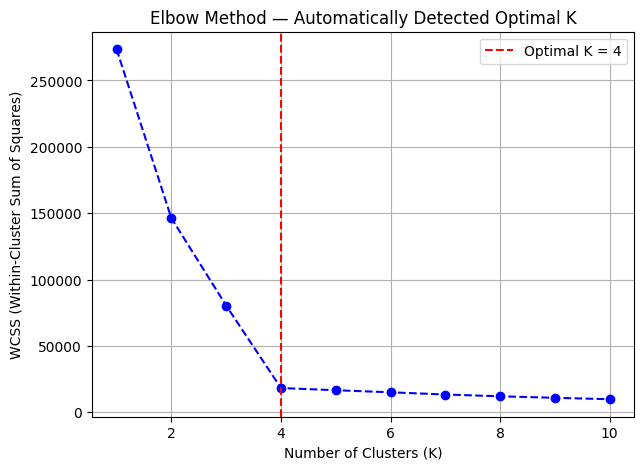

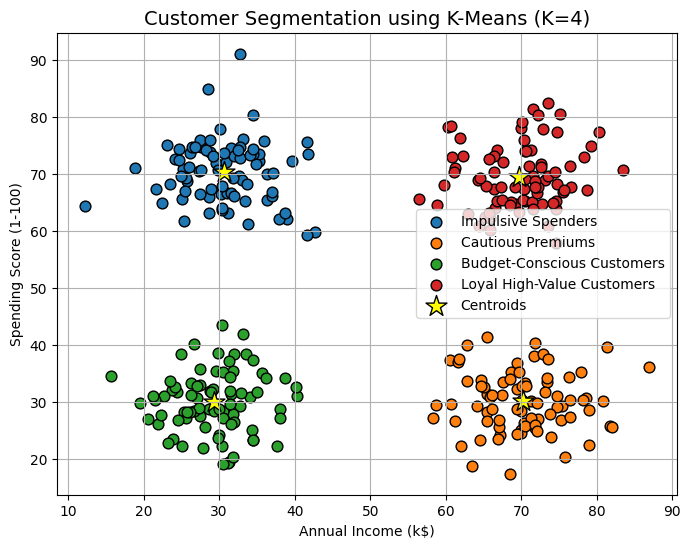

 CUSTOMER SEGMENTATION SUMMARY
 Impulsive Spenders: 80 customers | Avg Income = 30.7 | Avg Spend = 70.3
 Cautious Premiums: 80 customers | Avg Income = 70.2 | Avg Spend = 30.1
 Budget-Conscious Customers: 80 customers | Avg Income = 29.3 | Avg Spend = 30.0
 Loyal High-Value Customers: 80 customers | Avg Income = 69.7 | Avg Spend = 69.5


In [2]:
# ===============================================================
#  CUSTOMER SEGMENTATION USING K-MEANS (Auto K via Elbow)
# ===============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator  #  Automatically detects "elbow"

# ---------------------------------------------------------------
# 1️ Simulate a Customer Dataset
# ---------------------------------------------------------------
np.random.seed(42)

# Create 4 realistic clusters of customers
cluster_1 = np.random.multivariate_normal([30, 30], [[30, 0], [0, 30]], 80)   # Low income, low spending
cluster_2 = np.random.multivariate_normal([30, 70], [[30, 0], [0, 30]], 80)   # Low income, high spending
cluster_3 = np.random.multivariate_normal([70, 30], [[30, 0], [0, 30]], 80)   # High income, low spending
cluster_4 = np.random.multivariate_normal([70, 70], [[30, 0], [0, 30]], 80)   # High income, high spending

X = np.vstack((cluster_1, cluster_2, cluster_3, cluster_4))
df = pd.DataFrame(X, columns=["Annual Income (k$)", "Spending Score (1-100)"])

# ---------------------------------------------------------------
# 2️ Determine Optimal K using Elbow Method
# ---------------------------------------------------------------
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Automatically find the elbow (optimal k)
knee = KneeLocator(K_range, wcss, curve="convex", direction="decreasing")
optimal_k = knee.knee
print(f" Optimal number of clusters (K): {optimal_k}")

# Plot the Elbow Curve
plt.figure(figsize=(7, 5))
plt.plot(K_range, wcss, marker="o", linestyle="--", color="b")
plt.axvline(optimal_k, color="r", linestyle="--", label=f"Optimal K = {optimal_k}")
plt.title("Elbow Method — Automatically Detected Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# 3️ Apply K-Means using the detected K
# ---------------------------------------------------------------
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(df)

# ---------------------------------------------------------------
# 4️ Assign Meaningful Segment Names
# ---------------------------------------------------------------
cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()

segment_names = {}
for cluster, row in cluster_summary.iterrows():
    income, spend = row
    if income < 50 and spend < 50:
        segment_names[cluster] = "Budget-Conscious Customers"
    elif income < 50 and spend >= 50:
        segment_names[cluster] = "Impulsive Spenders"
    elif income >= 50 and spend < 50:
        segment_names[cluster] = "Cautious Premiums"
    else:
        segment_names[cluster] = "Loyal High-Value Customers"

df["Segment"] = df["Cluster"].map(segment_names)

# ---------------------------------------------------------------
# 5️ Visualization
# ---------------------------------------------------------------
plt.figure(figsize=(8,6))
colors = plt.cm.tab10.colors

for i in range(optimal_k):
    plt.scatter(
        df[df["Cluster"] == i]["Annual Income (k$)"],
        df[df["Cluster"] == i]["Spending Score (1-100)"],
        s=60,
        c=[colors[i]],
        label=f"{segment_names.get(i, f'Cluster {i+1}')}",
        edgecolors="k"
    )

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=250, c="yellow", marker="*", edgecolors="black", label="Centroids"
)

plt.title(f"Customer Segmentation using K-Means (K={optimal_k})", fontsize=14)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# 6️ Display Segment Summary
# ---------------------------------------------------------------
print("===============================================================")
print(" CUSTOMER SEGMENTATION SUMMARY")
print("===============================================================")
for cluster, name in segment_names.items():
    count = len(df[df["Cluster"] == cluster])
    avg_income = cluster_summary.loc[cluster, "Annual Income (k$)"]
    avg_spend = cluster_summary.loc[cluster, "Spending Score (1-100)"]
    print(f" {name}: {count} customers | Avg Income = {avg_income:.1f} | Avg Spend = {avg_spend:.1f}")
print("===============================================================")
